# Multiple Linear Regression

* More than **two variables**
* **Multiple independent variables** and **one dependent variable**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import Dataset

In [2]:
# Load data
df = pd.read_csv('../../datasets/ml_data_salary.csv')
df.head()

,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


## Split Data into Train and Test

In [3]:
# Split data into input (X) and output (y)
X = df[['age', 'distance', 'YearsExperience']]
y = df['Salary']

In [4]:
X.head()

,age,distance,YearsExperience
0,31.1,77.75,1.1
1,31.3,78.25,1.3
2,31.5,78.75,1.5
3,32.0,80.00,2.0
4,32.2,80.50,2.2


In [5]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [6]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# View training dataset
print(f'Training inputs:\n{X_train.head()}')
print(f'Training outputs:\n{y_train.head()}')
print(f'Training input shape: {X_train.shape}')
print(f'Training input shape: {y_train.shape}')

Training inputs:
     age  distance  YearsExperience
27  39.6     99.00              9.6
11  34.0     85.00              4.0
17  35.3     88.25              5.3
22  37.9     94.75              7.9
5   32.9     82.25              2.9
Training outputs:
27    112635
11     55794
17     83088
22    101302
5      56642
Name: Salary, dtype: int64
Training input shape: (24, 3)
Training input shape: (24,)


## Fit Linear Regression Model

In [8]:
# Create model
model = LinearRegression()
# Fit model
model = model.fit(X_train, y_train)
print('Training completed!!')

Training completed!!


In [9]:
# Find coefficient
m1, m2, m3 = model.coef_

print(f'First coefficient: {m1}')
print(f'Second coefficient: {m2}')
print(f'Third coefficient: {m3}')

First coefficient: -7234721743167015.0
Second coefficient: -216813894069688.5
Third coefficient: 7776756478350546.0


In [10]:
# Find interception
interception = model.intercept_
print(f'Interception: {interception}')

Interception: 2.3330269435026387e+17


## Make Predictions

In [11]:
y_preds = model.predict(X_test)
y_preds[:10] # first 10 predictions

array([ 40768., 122752.,  64960.,  63104., 115200., 107776.])

## Plotting

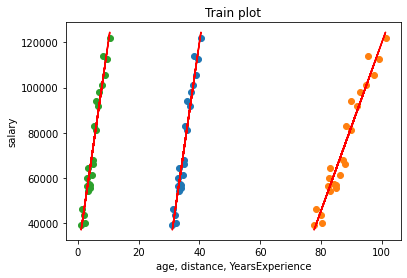

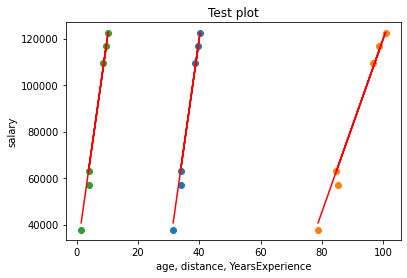

In [12]:
# Plotting on Training data
plt.scatter(X_train.age, y_train)
plt.scatter(X_train.distance, y_train)
plt.scatter(X_train.YearsExperience, y_train)

plt.plot(X_train.age, model.predict(X_train), color='red')
plt.plot(X_train.distance, model.predict(X_train), color='red')
plt.plot(X_train.YearsExperience, model.predict(X_train), color='red')
plt.xlabel('age, distance, YearsExperience')
plt.ylabel('salary')
plt.title('Train plot')
plt.show()

# Plotting on Test data
plt.scatter(X_test.age, y_test)
plt.scatter(X_test.distance, y_test)
plt.scatter(X_test.YearsExperience, y_test)

plt.plot(X_test.age, model.predict(X_test), color='red')
plt.plot(X_test.distance, model.predict(X_test), color='red')
plt.plot(X_test.YearsExperience, model.predict(X_test), color='red')
plt.xlabel('age, distance, YearsExperience')
plt.ylabel('salary')
plt.title('Test plot')
plt.show()

### 3D plot of Multi Linear Regression

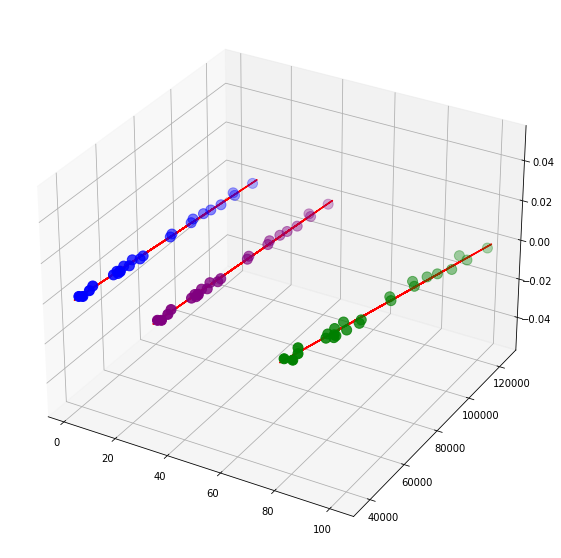

In [13]:
# 3d scatterplot using matplotlib on Training data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X_train.age, y_train, s=100, c='purple', label='age')
plt.scatter(X_train.distance, y_train, s=100, c='green', label='distance')
plt.scatter(X_train.YearsExperience, y_train, s=100, c='blue', label='YearsExperience')

# Plot predictions
plt.plot(X_train.age, model.predict(X_train), color='red')
plt.plot(X_train.distance, model.predict(X_train), color='red')
plt.plot(X_train.YearsExperience, model.predict(X_train), color='red')
plt.show()

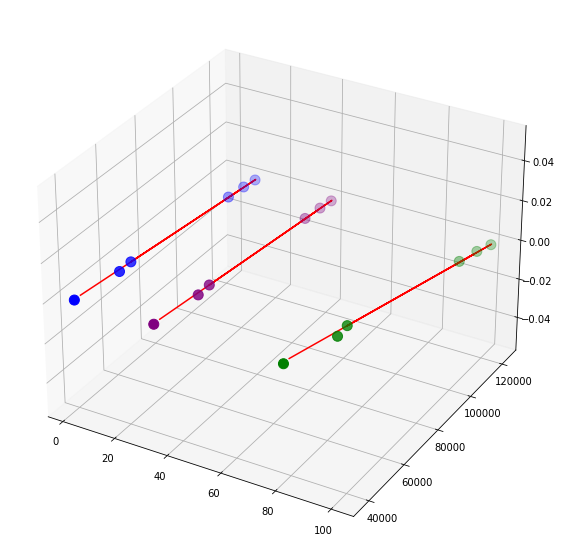

In [17]:
# 3d scatterplot using matplotlib on Test data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X_test.age, y_test, s=100, c='purple', label='age')
plt.scatter(X_test.distance, y_test, s=100, c='green', label='distance')
plt.scatter(X_test.YearsExperience, y_test, s=100, c='blue', label='YearsExperience')

# Plot predictions
plt.plot(X_test.age, model.predict(X_test), color='red')
plt.plot(X_test.distance, model.predict(X_test), color='red')
plt.plot(X_test.YearsExperience, model.predict(X_test), color='red')
plt.show()

# Evaluate Model

In [15]:
print(f'Train score: {model.score(X_train, y_train):.2f}')
print(f'Test score: {model.score(X_test, y_test):.2f}')
print(f'Model RMSE: {np.sqrt(mean_squared_error(y_test, y_preds)):.2f}')

Train score: 0.94
Test score: 0.99
Model RMSE: 3589.65
